<a href="https://colab.research.google.com/github/rushikeshb94/Capstone3/blob/master/inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone --quiet https://github.com/tensorflow/models.git

In [ ]:
%cd /content/models/research/
!sudo apt install -y protobuf-compiler
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.9 MB 8.1 MB/s 
     |████████████

In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 462 kB 66.5 MB/s 
     |████████████████████████████████| 1.4 MB 58.5 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-mode

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Version '8.1.0.77-1+cuda11.' for 'libcudnn8' was not found


In [ ]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-08-03 20:53:12.757775: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0803 20:53:13.481600 140383262726016 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.93s
I0803 20:53:14.374504 140383262726016 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.93s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.34s
I0803 20:53:15.713087 140383262726016 test

In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [ ]:
%cd /content/

!wget https://github.com/rushikeshb94/Capstone3/raw/master/inference_graph.zip
!unzip inference_graph.zip
!rm -r inference_graph.zip

/content
--2022-08-03 20:47:02--  https://github.com/rushikeshb94/Capstone3/raw/master/inference_graph.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rushikeshb94/Capstone3/master/inference_graph.zip [following]
--2022-08-03 20:47:02--  https://raw.githubusercontent.com/rushikeshb94/Capstone3/master/inference_graph.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16068809 (15M) [application/zip]
Saving to: ‘inference_graph.zip’

inference_graph.zip 100%[===================>]  15.32M  --.-KB/s    in 0.1s    

2022-08-03 20:47:02 (136 MB/s) - ‘inference_graph.zip’ saved [16068809/16068809]

In [ ]:
#test data
%cd /content/
!wget https://github.com/rushikeshb94/Capstone3/raw/master/data/test.zip
!unzip test.zip 
!rm -r test.zip

/content
--2022-08-03 21:45:13--  https://github.com/rushikeshb94/Capstone3/raw/master/data/test.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rushikeshb94/Capstone3/master/data/test.zip [following]
--2022-08-03 21:45:14--  https://raw.githubusercontent.com/rushikeshb94/Capstone3/master/data/test.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6318557 (6.0M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]   6.03M  --.-KB/s    in 0.08s   

2022-08-03 21:45:14 (76.2 MB/s) - ‘test.zip’ saved [6318557/6318557]

Archive:  test.zip
   creating: test/
 

In [ ]:
#labelmap
!wget https://raw.githubusercontent.com/rushikeshb94/Capstone3/master/labelmap.pbtxt

--2022-08-03 20:47:13--  https://raw.githubusercontent.com/rushikeshb94/Capstone3/master/labelmap.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271 [text/plain]
Saving to: ‘labelmap.pbtxt’

labelmap.pbtxt      100%[===================>]     271  --.-KB/s    in 0s      

2022-08-03 20:47:13 (20.4 MB/s) - ‘labelmap.pbtxt’ saved [271/271]



In [ ]:
labelmap_path = '/content/labelmap.pbtxt'
output_directory = 'inference_graph/'
test_images = '/content/test/'

In [ ]:
!wget https://raw.githubusercontent.com/rushikeshb94/Capstone3/master/inference_utils.py


--2022-08-03 20:47:15--  https://raw.githubusercontent.com/rushikeshb94/Capstone3/master/inference_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2222 (2.2K) [text/plain]
Saving to: ‘inference_utils.py’

inference_utils.py  100%[===================>]   2.17K  --.-KB/s    in 0s      

2022-08-03 20:47:16 (40.2 MB/s) - ‘inference_utils.py’ saved [2222/2222]



In [ ]:
from inference_utils import *

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/{output_directory}/saved_model/')

In [ ]:
import pandas as pd
test = pd.read_csv('/content/test/_annotations.csv')
images = list(test.sample(n=1)['filename'])


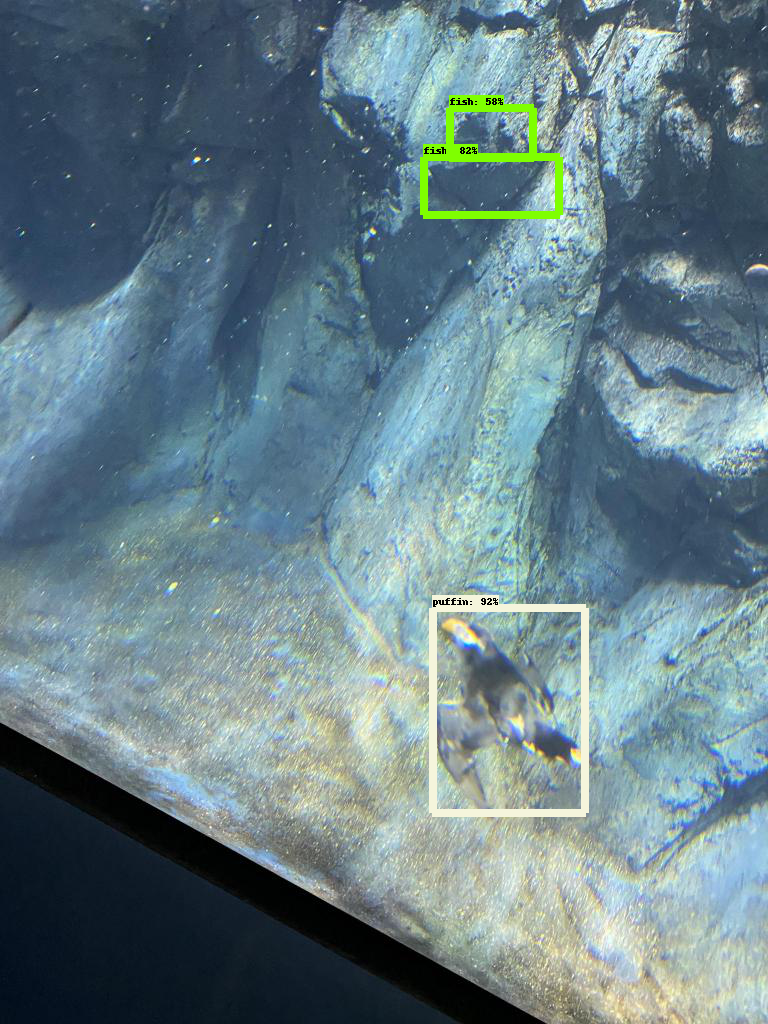

In [ ]:
for image_name in images:
  
  image_np = load_image_into_numpy_array(test_images + image_name)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))

In [ ]:
labels = label_map_util.get_label_map_dict('/content/labelmap.pbtxt')

In [ ]:
import json
with open('labels.json', 'w') as fp:
    json.dump(labels, fp)

In [ ]:
test_pred = pd.DataFrame()

In [ ]:
images = list(test['filename'])
for image_name in images:
    image_np = load_image_into_numpy_array(test_images + image_name)
    height, width, color = image_np.shape
    detections = run_inference_for_single_image(model, image_np)
    num_detections = int(detections.pop('num_detections'))
    for i in range(num_detections):
      ll = []
      ll.append(image_name)
      ll.append(width)
      ll.append(height)
      ll.append(detections['detection_boxes'][i].tolist())
      ll.append(category_index[detections['detection_classes'][i]]['name'])
      ll.append(detections['detection_scores'][i])
      pre_df =pd.DataFrame([{'filename':ll[0],
                          'width':ll[1],
                          'height':ll[2],
                          'class':ll[4],
                          'xmin':ll[3][1] * width,
                          'ymin':ll[3][0] * height,
                          'xmax':ll[3][3] * width,
                          'ymax':ll[3][2] * height,
                          'score':ll[5]}])
      test_pred = pd.concat([test_pred,pre_df],axis=0)
 
print('Done')



Done


In [ ]:
test_pred.to_csv("/content/test_pred.csv",index=False)

In [ ]:
from google.colab import files
files.download("/content/test_pred.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_pred.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,score
0,IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...,768,1024,puffin,396.076538,452.864868,472.988571,524.310059,0.749426
0,IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...,768,1024,fish,516.362000,503.283020,615.263763,544.577698,0.679170
0,IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...,768,1024,shark,182.700691,6.394917,258.639015,61.020054,0.570019
0,IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...,768,1024,puffin,424.907410,302.080597,505.461731,377.517853,0.558871
0,IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...,768,1024,puffin,19.453237,685.207336,102.910927,770.374573,0.556122


In [ ]:
files.download('/content/labels.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>